In [1]:
import numpy as np
from sympy import *

# Quadratic programming (optimization) with constraints

In quadratic programming, objective function is of quadratic form.

for variables $x_1, x_2$:

$ f = a x_1^2 + b x_2^2 + c x_1 + d x_2 + e x_1 x_2$ + const

_~additional constant does not influence objective's landscape (minimum or maximum position)~_


Which should be express in matrix form:

$f = \frac{1}{2}
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
Q_{11} & Q_{12} \\ Q_{21} & Q_{22}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} + 
\begin{bmatrix}
c_1 & c_2
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}=
\frac{1}{2} x^T Q x + c^T x
$

Subjected to (s.t) constrains:

$\begin{cases}
A_{11} x_1 + A_{12} x_2 \leq b_{1}  \\
A_{21} x_1 + A_{22} x_2 \leq b_{2}  \\
\cdots \\
A_{n1} x_1 + A_{n2} x_2 \leq b_{n}  \\
\end{cases}
\rightarrow
Ax \leq b
$


In [2]:
x1,x2, c1, c2  = symbols("x_1, x_2, c_1, c_2")

q11, q12, q21, q22  = symbols("Q_{11} Q_{12} Q_{21} Q_{22}")

Q = Matrix([[q11,q12],[q21,q22]])
x = Matrix([[x1,x2]]).T
c = Matrix([[c1,c2]]).T

f = 1/2*(x.T @ Q @ x) +c.T @ x
inp = collect(f.expand()[0], x1*x2)
display(inp)
#latex(inp)

0.5*Q_{11}*x_1**2 + 0.5*Q_{22}*x_2**2 + c_1*x_1 + c_2*x_2 + x_1*x_2*(0.5*Q_{12} + 0.5*Q_{21})

which expands into:

$f = \frac{1}{2} Q_{11} x_{1}^{2} + \frac{1}{2} Q_{22} x_{2}^{2} + c_{1} x_{1} + c_{2} x_{2} + x_{1} x_{2} \cdot \frac{1}{2} \left(Q_{12} + Q_{21}\right)$

Given

$ f = a x_1^2 + b x_2^2 + c x_1 + d x_2 + e x_1 x_2$

We can see that:

$
\begin{cases}
      Q_{11}    = 2 a   \\ 
      Q_{22}    = 2 b   \\
      c_1       = c     \\
      c_2       = d     \\
\end{cases}
$

but $e = \frac{1}{2} \left(Q_{12} + Q_{21}\right)$. If we take $Q_{12} = Q_{21}$, 

$e = \frac{2}{2} Q_{12} = Q_{12}$

$
\begin{cases}
      Q_{12}    = e   \\ 
      Q_{21}    = e   \\
\end{cases}
$

We can check:

$f = \frac{1}{2}
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}2 a & e\\e & 2 b\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} + 
\begin{bmatrix}
c & d
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}=
a x_{1}^{2} + b x_{2}^{2} + c x_{1} + d x_{2} + e x_{1} x_{2}
$

In [3]:
a,b,c,d,e  = symbols("a,b,c,d,e")

Q = Matrix([[2*a, e],[e,2*b]])
x = Matrix([[x1,x2]]).T
c = Matrix([[c,d]]).T

f = 1/2*(x.T @ Q @ x) +c.T @ x
inp = collect(f.expand()[0], x1*x2)
display(inp)
#latex(inp, mat_delim='')

1.0*a*x_1**2 + 1.0*b*x_2**2 + c*x_1 + d*x_2 + 1.0*e*x_1*x_2

## Example:
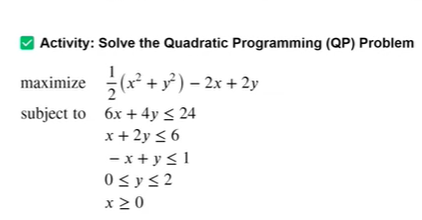

form https://youtu.be/gec5YQckkE0?t=593

$
\begin{cases}
6 x + 4 y \leq 24    \\
1 x + 2 y \leq 6  \\
-x + 1 y \leq 1
\end{cases}
\rightarrow
\begin{bmatrix}
6 & 4 \\  1 & 2 \\ -1 & 1 
\end{bmatrix}
\begin{bmatrix}
x \\ y
\end{bmatrix}
\leq
\begin{bmatrix}
24 \\ 6 \\ 1
\end{bmatrix}
$

$
\begin{cases}
0 \leq y \leq 2 \\
x \geq 0 \text{ (reverse)}
\end{cases}
\rightarrow
\begin{cases}
0 x + y \leq 2    \\
0 x - y \leq 0  \\
-x + 0 y \leq 0
\end{cases}
\rightarrow
\begin{bmatrix}
0 & 1 \\  0 & -1 \\ -1 & 0 
\end{bmatrix}
\begin{bmatrix}
x \\ y
\end{bmatrix}
\leq
\begin{bmatrix}
2 \\ 0 \\ 0
\end{bmatrix}
$

Using cvxopt (DOES NOT WORK :C):

https://cvxopt.org/userguide/coneprog.html?highlight=cvxopt%20solvers%20qp#quadratic-programming

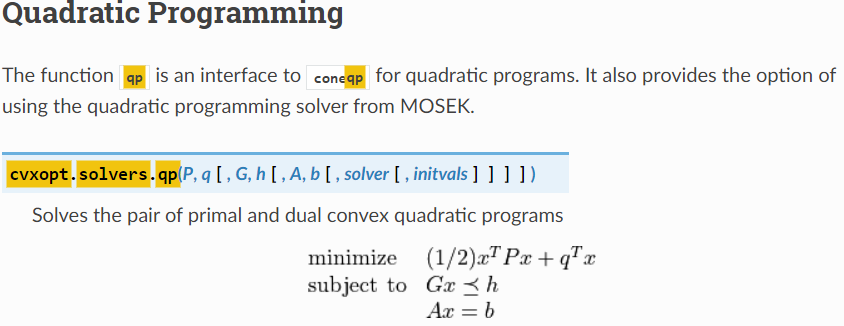



$f = \frac{1}{2} x^2 + \frac{1}{2} y^2 - 2 x + 2 y + 0 x y$

In [4]:
from cvxopt import matrix, solvers
from sympy.abc import x,y
import sympy
from IPython.display import Math

#solvers.options['refinement'] = 1
a, b, e = 1/2, 1/2, 0
c,d = -2.0, 2.0

P =    np.array([[2*a, e],[e, 2*b]]                        , float)
q =    np.array([[c, d]]                                   , float).T
G =    np.array([[6,4],[1,2],[-1,1],[0,1],[0,-1],[-1,0]]   , float)
h =    np.array([[24,6,1,2,0,0]]                           , float).T

# test
x_test = np.array([[x, y]]).T
test = 0.5*x_test.T @ P @ x_test + q.T @ x_test
display(Math(sympy.latex(test[0,0])))

<IPython.core.display.Math object>

In [5]:
# -1*f to maximize
P,q = -P,-q

P,q,G,h = [matrix(a) for a in [P,q,G,h] ]

sol=solvers.qp(P=P, q=q, G=G, h=h)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -8.1723e+00 -2.1792e+00  5e+01  3e-01  1e+01
 1: -1.4097e+00 -6.0880e+00  5e+00  6e-17  4e-15
 2: -2.6844e+00 -6.3283e+00  4e+00  8e-17  4e-15
 3: -2.5517e+00 -4.6370e+00  2e+00  3e-16  3e-15
 4: -2.5847e+00 -4.6681e+00  2e+00  4e-16  3e-15
Terminated (singular KKT matrix).
[ 2.96e+00]
[ 1.50e+00]



### scipy.optimize.minimize
_accepts bounds explicitly bounds = ((x1min, x1max), (x2min, x2max)) and constrains are of form:_

$Gx -h \geq 0$

This algoritm requires x input as a tuple, not as a column matrix. Can drop transposes for vector-matrix multiplication.

In [6]:
from scipy.optimize import minimize
from sympy.abc import x,y

P =    np.array([[2*a, e],[e, 2*b]], float)
q =    np.array([[c, d]]           , float)

def fun(x):
    return -(0.5*x @ P @ x + q @ x)

test = np.array([x, y])
display(Math(sympy.latex(fun(test)[0])))
#print(fun(np.array([x, y])))

G =    np.array([[6,4]  ,[1,2]  ,[-1,1]], float)
h =    np.array([24    ,6      ,1]    , float)


# our constaints are of form Gx >= h -> Gx-h >= 0. invert to get -(Gx-h) <= 0
def constraint(x):
    return -(G @ x - h)

[display(Math(sympy.latex(a))) for a in constraint(test)]


bnds = ((0, None), (0, 2))
cons = {'type': 'ineq', 'fun': constraint}
res = minimize(fun, (0.5, 0.5), method='SLSQP', bounds=bnds, constraints=cons)
display(res)
#-fun(res.x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -4.500000000000044
       x: [ 1.000e+00  2.000e+00]
     nit: 3
     jac: [ 1.000e+00 -4.000e+00]
    nfev: 9
    njev: 3

C:\Users\Hot Mexican\AppData\Local\Temp\ipykernel_20216\832247090.py:33: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(PC, location='top')


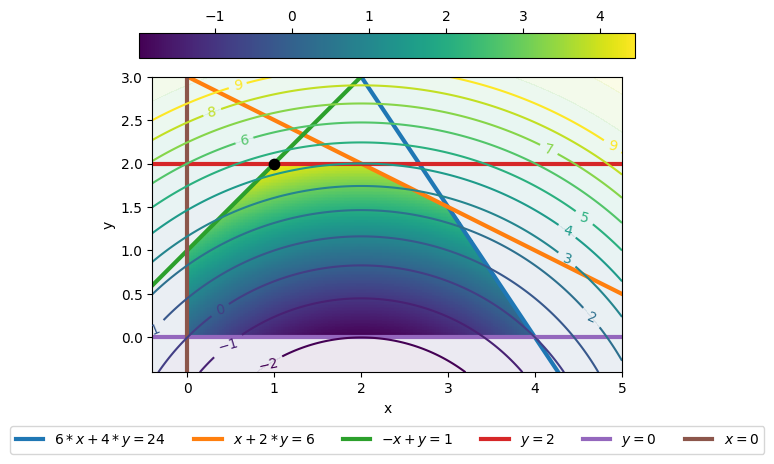

In [7]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

from sympy import solve, lambdify

xmin = -0.4; ymin = -0.4
x_args = np.linspace(xmin,5,200)
y_args = np.linspace(ymin,3,200)
y_args0= np.zeros_like(y_args)
x_args0= np.zeros_like(x_args)
xx,yy = np.meshgrid(x_args,y_args, sparse=False)

fig, ax = plt.subplots(1)

objective_f = lambda x,y: 0.5*(x**2 + y**2) - 2*x + 2*y
obj = objective_f(xx,yy)
ax.contourf(xx, yy, obj, zorder = 1, alpha = 0.1)

l1 = lambdify(x, solve(6*x+4*y-24   , y, dict=False)[0]) 
l2 = lambdify(x, solve(x+2*y-6      , y, dict=False)[0]) 
l3 = lambdify(x, solve(-x+y-1       , y, dict=False)[0]) 
l4 = np.ones_like(x_args)*2

# region as bool mask 
region = ((6*xx+4*yy<=24) & (xx+2*yy<=6) & (-xx+yy<=1) & (xx >= 0) & (yy <= 2) & (yy >= 0))
# -> alphas mask
#extend = [xx.min(),xx.max(),yy.min(),yy.max()]
#alphas = np.where(region > 0, 1, 0)*0.5
#ax.imshow(region, extent=extend, alpha = alphas, origin='lower', cmap='Greys')
zm = np.ma.array(obj, mask = ~region)
PC = ax.pcolor(xx, yy, zm, alpha=1)#, hatch='//') 
plt.colorbar(PC, location='top')
ax.plot(x_args  , l1(x_args), lw = 3, label=r'$6*x+4*y = 24$'   )
ax.plot(x_args  , l2(x_args), lw = 3, label=r'$x+2*y = 6$'      )
ax.plot(x_args  , l3(x_args), lw = 3, label=r'$-x+y = 1$'       )
ax.plot(x_args  , l4        , lw = 3, label=r'$y = 2$'          )
ax.plot(x_args  , y_args0   , lw = 3, label=r'$y = 0$'          )
ax.plot(x_args0 , y_args    , lw = 3, label=r'$x = 0$'          )

obj = objective_f(xx,yy)
CS = ax.contour(xx,yy,obj,np.arange(-2,10))
ax.clabel(CS, inline=1, fontsize = 10)#, colors = 'k')
ax.scatter(*res.x.T, s = 55, c = 'k', zorder = 2)#, label ='sol'
ax.set_ylim(ymin,3)
ax.set_xlim(xmin,5)
ax.set_aspect('equal')
plt.legend(bbox_to_anchor=(0.5,-0.3), loc='lower center', ncol = 6);plt.xlabel('x');plt.ylabel('y');